In [1]:
import numpy as np
import scipy as sp
from sympy import Symbol, Poly
import matplotlib.pyplot as plt
import resource
from IPython.display import display

In [ ]:
import sys
sys.path.append("..")

from ggqpy import construct_Chebyshev_quadratures
from ggqpy.functionfamiliy import Interval, FunctionFamily
from ggqpy.testproblems import example_problem, gen_poly_and_sing
from ggqpy.discretize import Discretizer
from ggqpy.compress import compress_sequence_of_functions, visualise_diagonal_dropoff, construct_A_matrix, interp_legendre
from ggqpy.optimize import QuadOptimizer
from ggqpy.visualize import plot_points

In [2]:
eps_disc = 1e-10
eps_comp = 1e2*eps_disc
I = Interval(-1,1)
seed = 0

x = Symbol("x")
F = FunctionFamily(I, [1 + 1e-100*x] + [x**k for k in range(1,30)])
ex_f, ex_f_expr = F.generate_example_function()

In [3]:
number_of_points = 100
disc = Discretizer(eps_disc, min_length=1e-4, interpolation_degree=number_of_points) 
x_disc, w_disc, endpoints, intervals = disc.adaptive_discretization(F)

In [4]:
U_disc, rank = compress_sequence_of_functions(F.functions,(x_disc,), w_disc, eps_comp)
u_list = interp_legendre(U_disc, number_of_points, intervals)

0.666666666666659

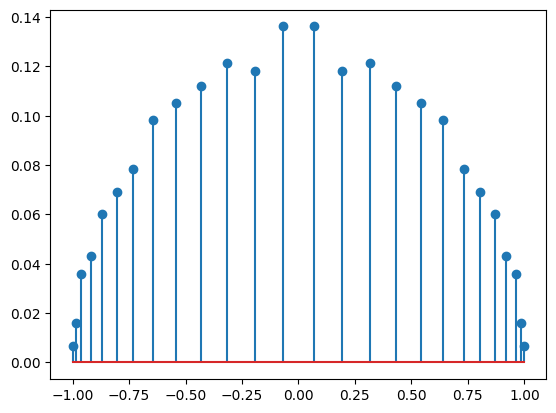

In [12]:
(x_cheb,),w_cheb = construct_Chevyshev_quadratures((x_disc,),w_disc,U_disc)
plt.stem(x_cheb,w_cheb)

x_gl,w_gl = np.polynomial.legendre.leggauss(10)
# plt.stem(x_gl,w_gl,markerfmt="r")
x_cheb**2@w_cheb

In [ ]:
r = U_disc.T@w_disc
eps_quad = 0.1
opt = QuadOptimizer(u_list,r)
x,w = opt.point_reduction(x_cheb,w_cheb,eps_quad)


[ 1.22353418e-03  5.91092757e-03  1.22134150e-02  1.68874916e-02
  1.67116791e-02  1.04497945e-02  4.57456352e-11 -1.04497944e-02
 -1.67116791e-02 -1.68874915e-02 -1.22134150e-02 -5.91092757e-03
 -1.22353418e-03]


1.9999999999999958

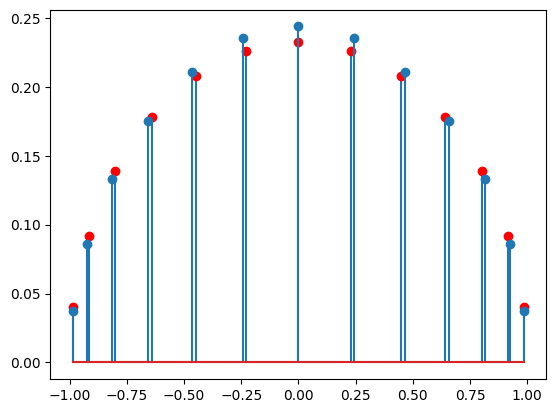

In [ ]:
x_gl,w_gl = np.polynomial.legendre.leggauss(len(x))
plt.stem(x_gl,w_gl,markerfmt="r")
plt.stem(x,w)
print(x_gl-sorted(x))
w.sum()